# 【問題1】train_test_splitのスクラッチ

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import japanize_matplotlib
import sys
sys.path.append('/Users/takahashiakira/Documents/DIC/diveintocode-ml/ ml-scratch/model')
sys.path.append('/Users/takahashiakira/Documents/DIC/diveintocode-ml/ ml-scratch/utils')

In [2]:
def train_test_split_sc(X, y, train_size=0.8,seed=None,shuffle=True):
    """
    学習用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """

    #train_sizeが0~1の範囲じゃ無い場合はエラーを吐く
    if train_size >= 1. or train_size < 0:
        raise ValueError("train_size=%f 0〜1の範囲で設定してください" % train_size)
    
    # numpy配列じゃない場合はnumpy配列に変更する
    if type(X) != np.ndarray:
        X = X.values
        
    if type(y) != np.ndarray:
        y = y.values
        

    #ランダムシードを設定する
    np.random.seed(seed)

    #Xの中からtrain_size割をtrainとする
    train_n = int(X.shape[0]*train_size)

    #shuffle=trueの時indexをシャッフルする
    if shuffle == True:
        index = np.random.permutation(X.shape[0])
    else:
        index = np.arange(X.shape[0])

    #出来上がったindexを使って　trainとtestにX、yを分割していく
    X_train = X[index][:train_n,:]
    y_train = y[index][:train_n]
    X_test = X[index][train_n:,:]
    y_test = y[index][train_n:]


    return X_train, X_test, y_train, y_test

In [3]:
#動作チェックの為、サンプルの配列を作成
#１００行１０列のnumpy配列
sample = np.arange(1000).reshape(100,10)

#X,yに分ける
y = sample[:,0]
X = sample[:,1:]

#関数実行
X_train, X_test, y_train, y_test = train_test_split_sc(X,y,seed=0,)

#確認
len(X_train),len(X_test),len(y_train),len(y_test)

(80, 20, 80, 20)

In [4]:
#データフレームの場合
dfX = pd.DataFrame(X)
dfy = pd.DataFrame(y)

#関数実行
X_train, X_test, y_train, y_test = train_test_split_sc(dfX,dfy,seed=0,)

#確認
len(X_train),len(X_test),len(y_train),len(y_test)

(80, 20, 80, 20)

多分同じ様な動きをしている。

# 【問題2】 分類パイプラインの作成

分類は3種類の手法を扱います。pyファイルで実行できる分類のパイプラインを作成してください。  
- ロジスティック回帰
- SVM
- 決定木

In [5]:
#自作関数をインポート
from split import train_test_split
from logisticregression import LogisticRegression_scratch
from SVC import Svc_scratch
from decisiontreeclassifier import DecisionTreeClassifier_scratch
from linear_regression import ScratchLinearRegression
from decision_region import decision_region2
from tree_image import tree_image

In [6]:
#混合行列の関数を作成
def matrix(y_test,y_pred):
    #混合行列を作成
    cm = confusion_matrix(y_test,y_pred) 
    #可視化 
    sns.heatmap(cm,annot=True,square=True) 
    plt.xlabel('predict label')
    plt.ylabel('true label');

## ロジスティック回帰の使用

In [7]:
#データをロード
data = load_iris()
#特徴量をdfとして作成
X = pd.DataFrame(data.data,columns=data.feature_names)
#ターゲットをdfとして作成
y = pd.DataFrame(data.target,columns=['Species'])
#Xとyを結合
df = X.join(y)
#Speciesが1,2のものを抽出。インデックスを付け直しもした。
df = df[df.Species != 0].reset_index(drop=True)
#1と２を０，１にする
df['Species'] = df.Species.where(df.Species == 2,0)
df['Species'] = df.Species.where(df.Species == 0,1)
X = df.drop('Species', axis=1)
y = df['Species']

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


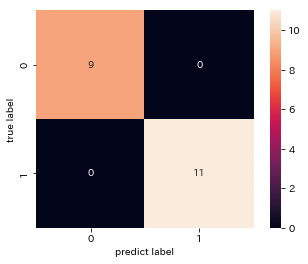

In [8]:
#学習、検証と分ける。
X_train,X_test,y_train,y_test = train_test_split(X,y)

lrs = LogisticRegression_scratch() # インスタンス化
lrs.fit(X_train,y_train) # 学習(内部で標準化はされている。)
y_pred = lrs.predict(X_test) # 予測

#可視化
matrix(y_test,y_pred)

まあ予測はできている。

## SVMを使用して分類

In [9]:
#シンプルデータセット１
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

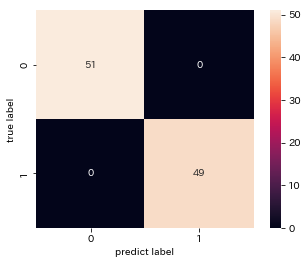

In [10]:
#学習、検証と分ける。
X_train,X_test,y_train,y_test = train_test_split(X,y)
svc = Svc_scratch() # インスタンス化
svc.fit(X_train,y_train) # 学習(内部で標準化はされている。)
y_pred = svc.predict(X_test) # 予測
matrix(y_test,y_pred)

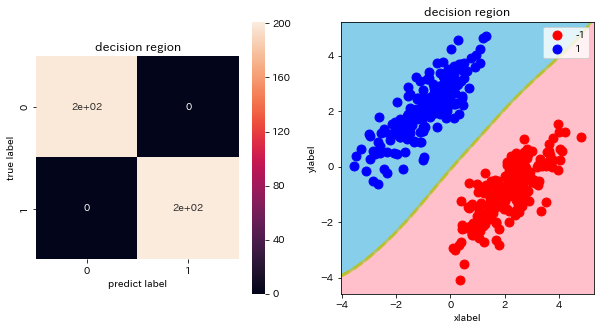

,f1-score,precision,recall,support
-1,1.000,1.000,1.000,199.000
1,1.000,1.000,1.000,201.000
micro avg,1.000,1.000,1.000,400.000
macro avg,1.000,1.000,1.000,400.000
weighted avg,1.000,1.000,1.000,400.000


In [11]:
#混合行列と決定領域とレポートを出す関数
decision_region2(X_train=X_train,y_train=y_train,model=svc)

## 決定木の場合

In [12]:
#シンプルデータセット２
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

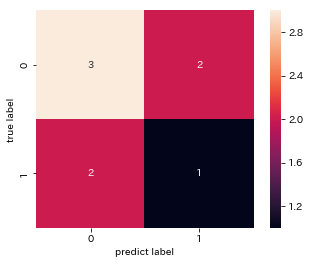

In [13]:
#学習、検証と分ける。
X_train,X_test,y_train,y_test = train_test_split(X,y)
dtc = DecisionTreeClassifier_scratch() # インスタンス化
dtc.fit(X_train,y_train) # 学習
y_pred = dtc.predict(X_test) # 予測
matrix(y_test,y_pred)

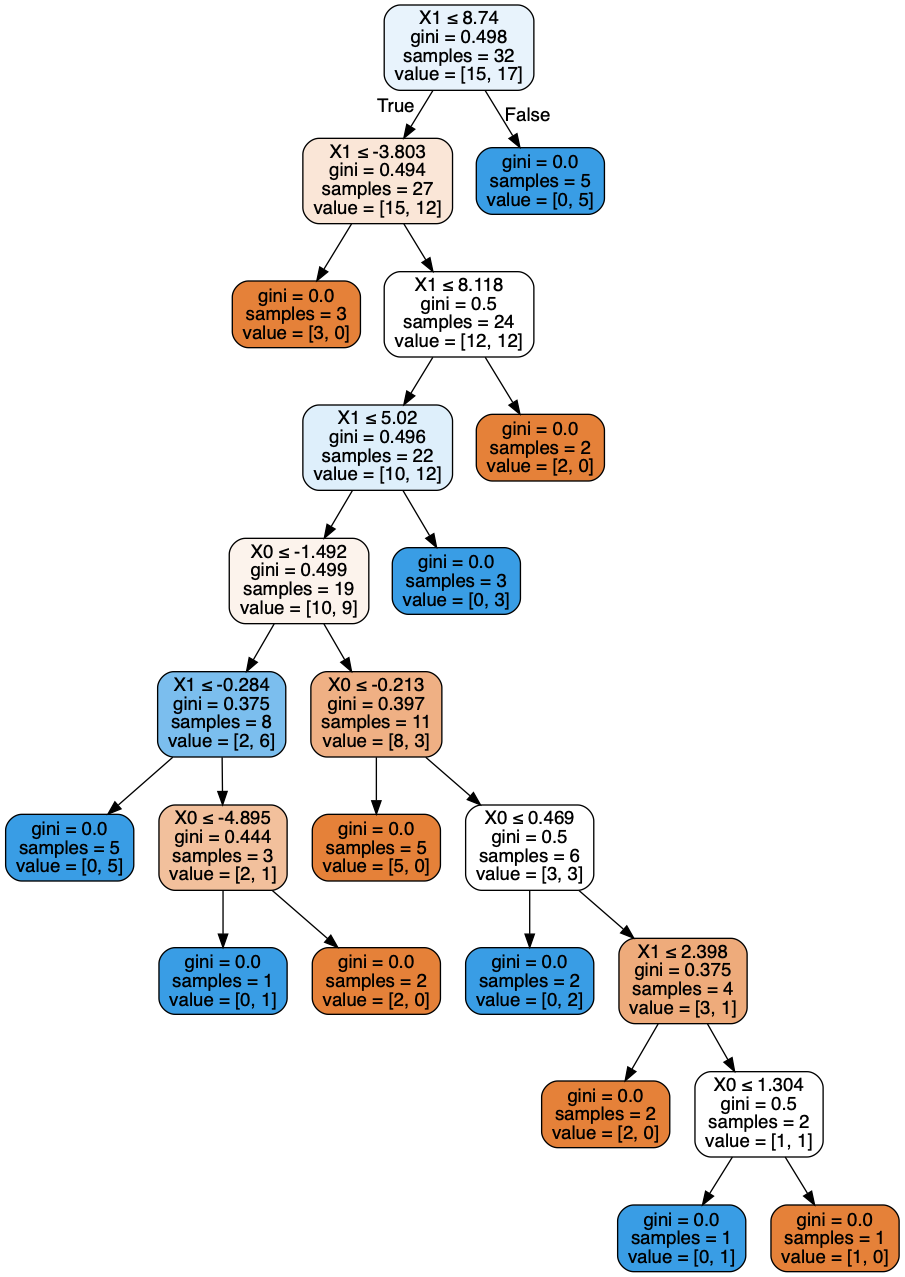

In [14]:
#決定木を可視化する関数
tree_image(dtc.cls)

あまり予測しない。。。というか過学習してそう。

# 【問題3】 回帰パイプラインの作成

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。

In [15]:
df = pd.read_csv('train.csv')
y = df.SalePrice
X = df[['GrLivArea','YearBuilt']]
X_train,X_test,y_train,y_test = train_test_split(X,y,scaler=True) #train_test_splitの際に標準化をしてみる。
slr = ScratchLinearRegression() #インスタンス化

grad < 0.001
iter 1,894回で学習終了


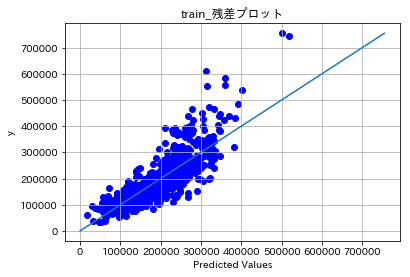

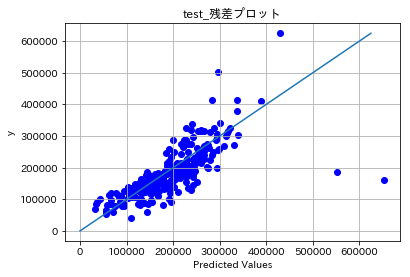

In [16]:
#今回はsprint3で作成した自作線形回帰を使用して確認してみる。
slr.fit(np.array(X_train),np.array(y_train),X_val=np.array(X_test),y_val=np.array(y_test))

問題なし！